In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from sklearn.cluster import	KMeans
# from scipy.spatial.distance import cdist 

In [3]:
Insurance = pd.read_csv("Insurance Dataset.csv")
Insurance

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000
...,...,...,...,...,...
95,25575,63,76,16161.979170,170500
96,25800,62,166,23715.151520,172000
97,26025,59,167,24043.401020,173500
98,26250,58,245,40147.058820,175000


In [4]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


### All numeircal variables or data points

# 1. Missing Values

In [5]:
Insurance.isna().sum()

Premiums Paid    0
Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64

## No Missing values

# Histogram to see distibution of  Data and skewness.

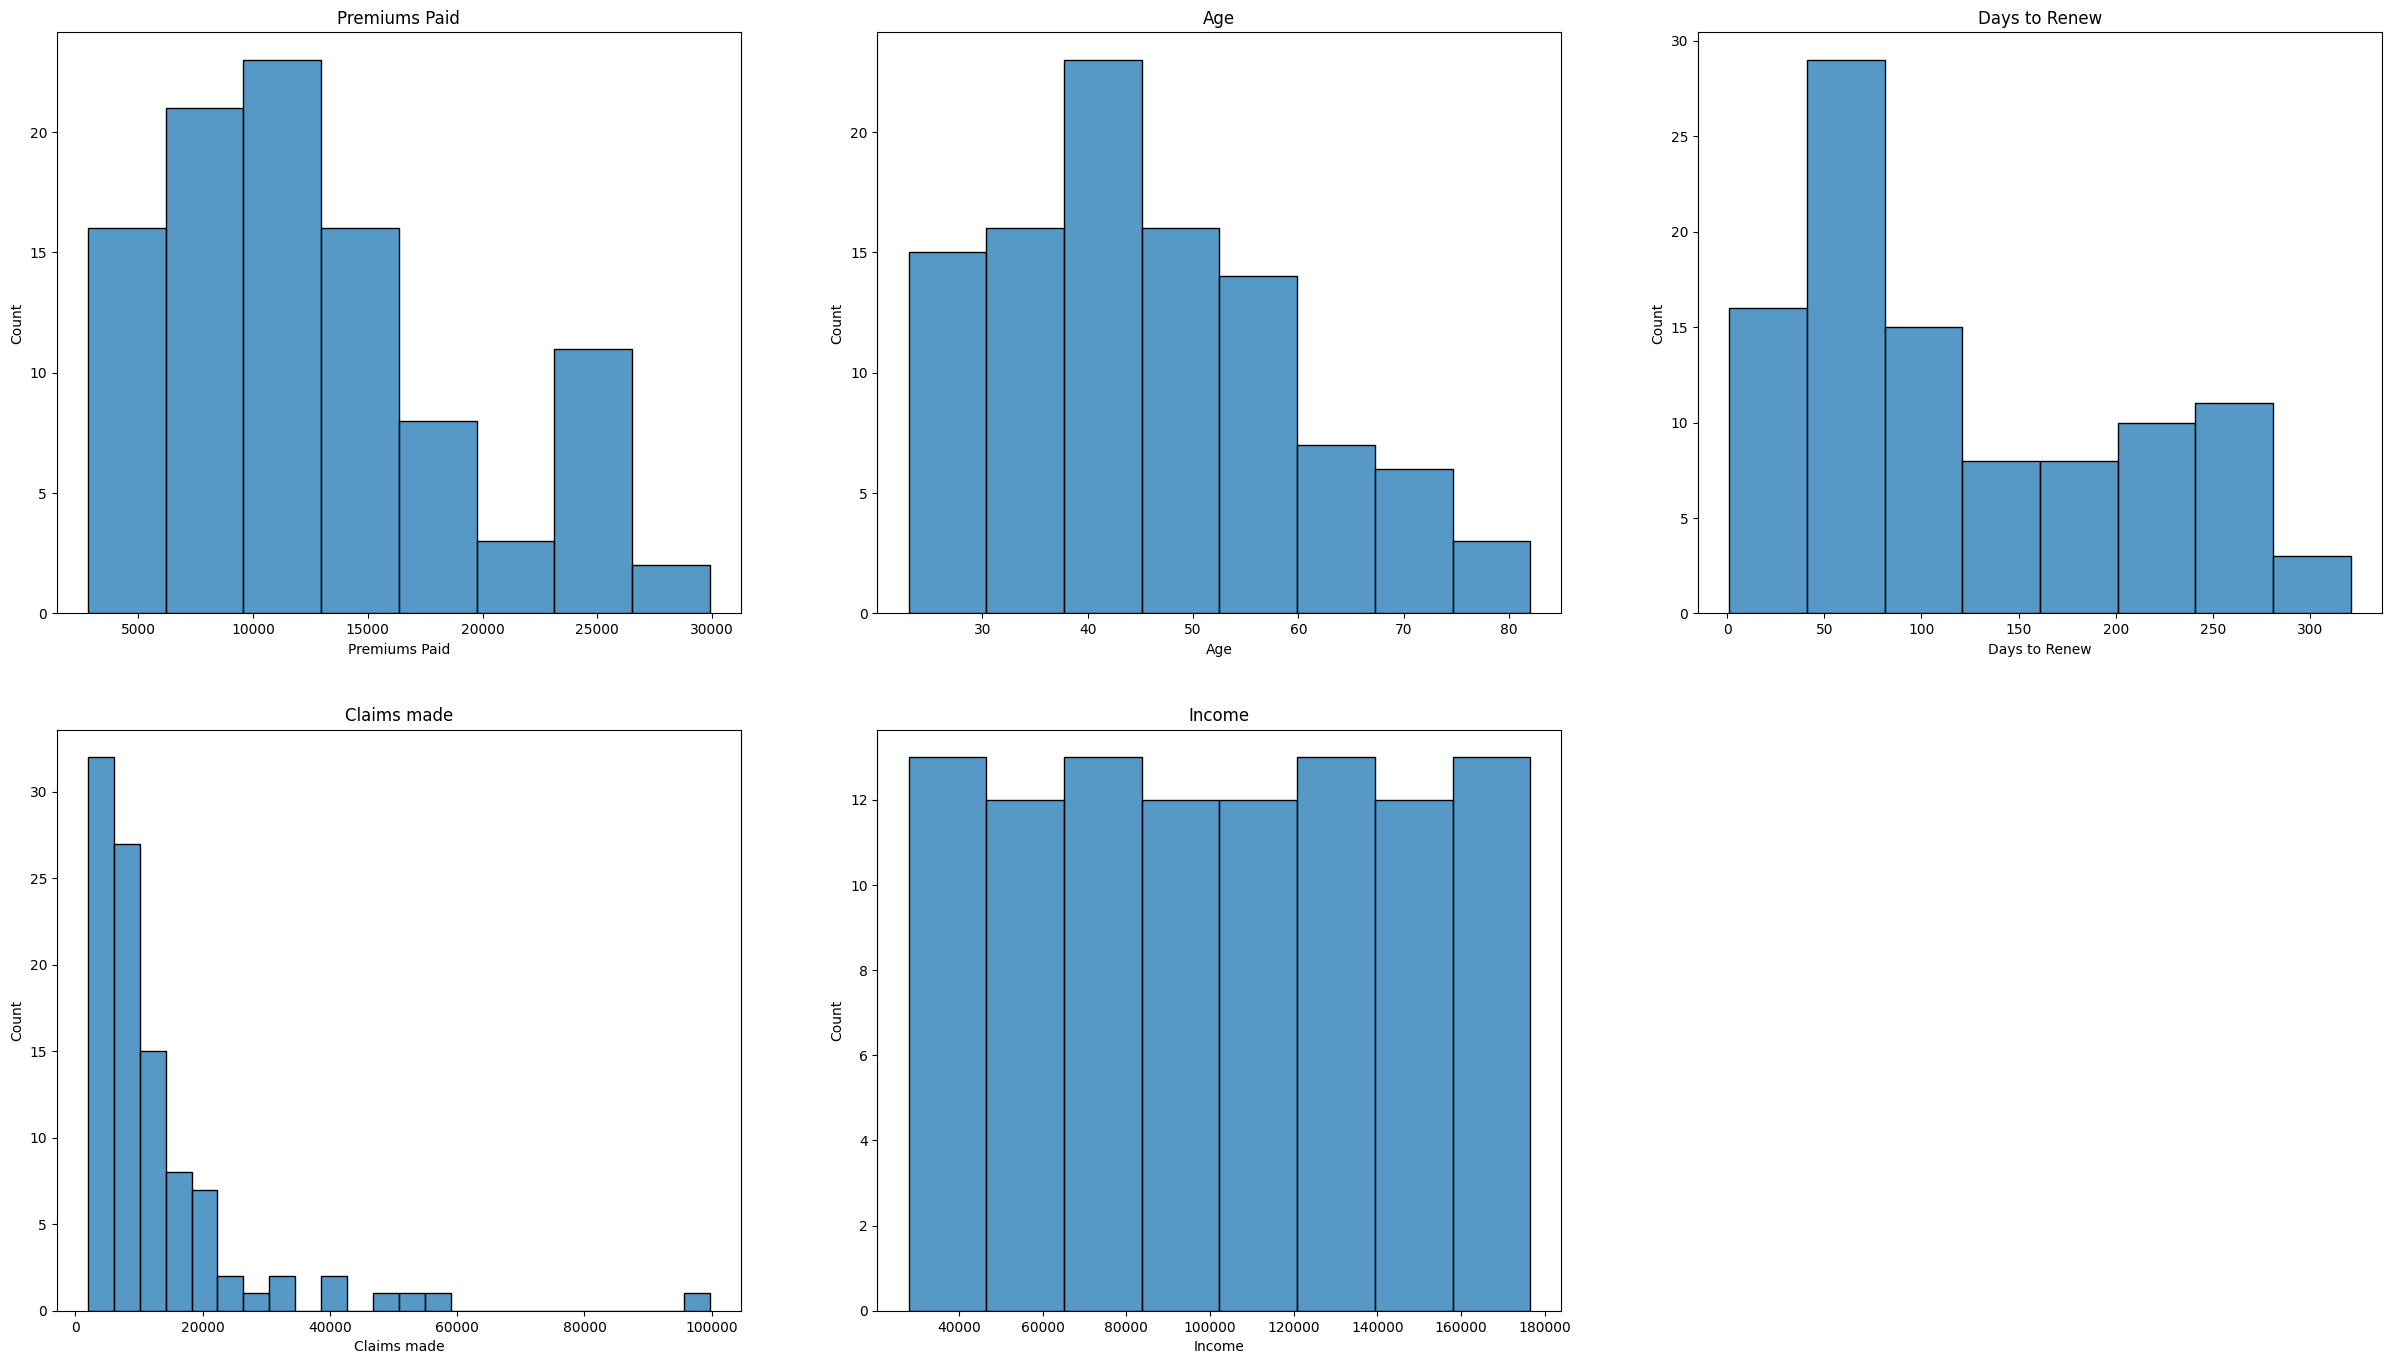

In [6]:
a = 9  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,80))

for i in Insurance.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))

    sns.histplot(data= Insurance, x= i)

    c = c + 1

plt.show()

# decreate values

In [7]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in Insurance.columns if len(Insurance[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


# Continous Features

In [8]:
continuous_feature=[feature for feature in Insurance.columns if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))


Continuous feature Count 5


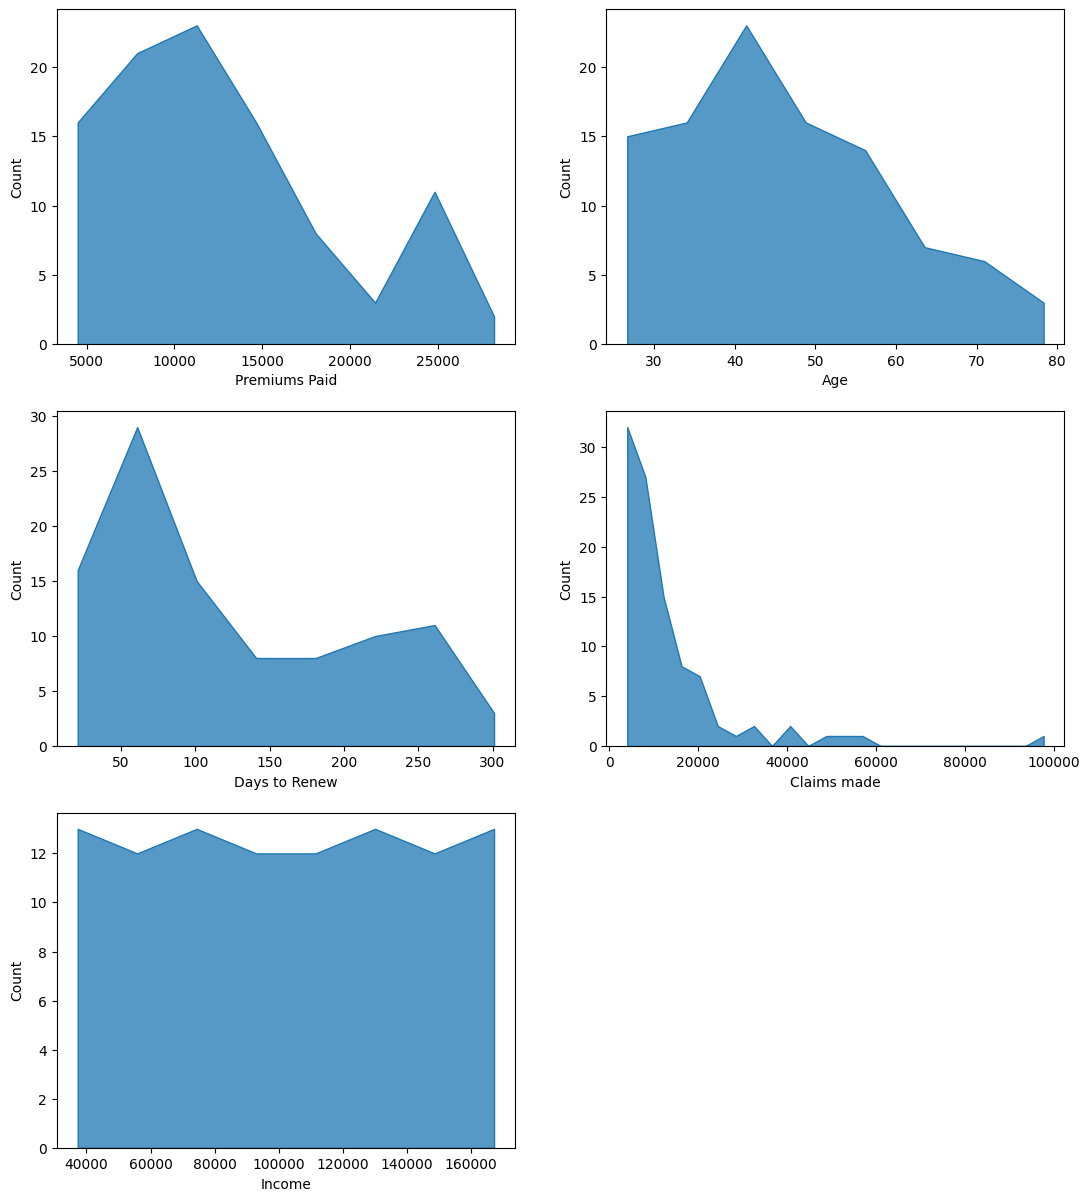

In [9]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= i ,data= Insurance, element= "poly", palette="deep" )

    c = c + 1

plt.show()

# Checking for outliers 

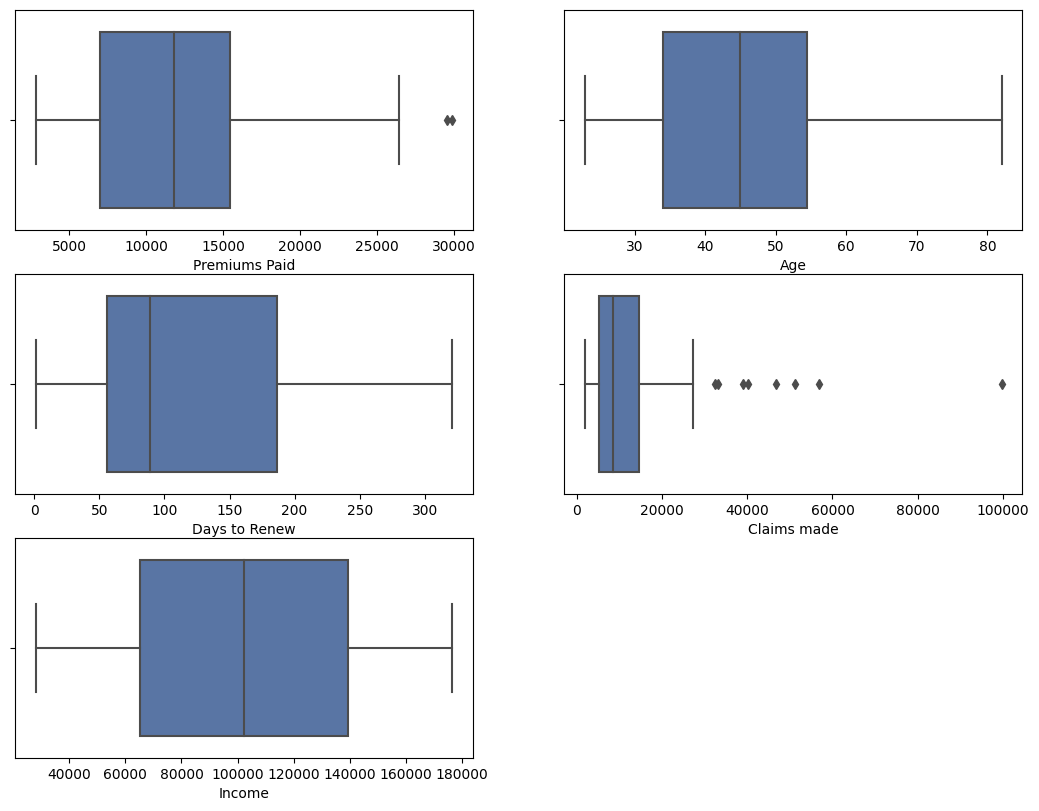

In [10]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in Insurance.columns:
    plt.subplot(a, b, c)

    sns.boxplot(x= i ,data= Insurance, palette="deep" )

    c = c + 1

plt.show()

# from above we can see there are few number of ouliers in the dataset

In [11]:

for i in Insurance.columns:
    s = Insurance[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

column Premiums Paid  {80: 29600, 81: 29900} 

column Age  {} 

column Days to Renew  {} 

column Claims made  {35: 51108.13953, 71: 56927.90698, 84: 38927.77778, 85: 32405.72519, 86: 99676.74419, 87: 33030.91603, 98: 40147.05882, 99: 46781.06796} 

column Income  {} 



## Replacing outlier with upper and lower limit

In [12]:
for i in Insurance.columns:
    s = Insurance[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr

    Insurance[i] = pd.DataFrame(np.where(Insurance[i] > iqr_upper, iqr_upper, np.where(Insurance[i] <  iqr_lower,  iqr_lower, Insurance[i])))

## outliers Removed 

In [13]:
for i in Insurance.columns:
    s = Insurance[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

column Premiums Paid  {} 

column Age  {} 

column Days to Renew  {} 

column Claims made  {} 

column Income  {} 



#                                                            K Mean Clustering 

In [14]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [15]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Insurance.iloc[:, :])


In [16]:
df_norm.isna().sum() #missing values 

Premiums Paid    0
Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64

In [17]:
###### scree plot or elbow curve ############
TWSS = []
k = [*range(2, 9)]

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

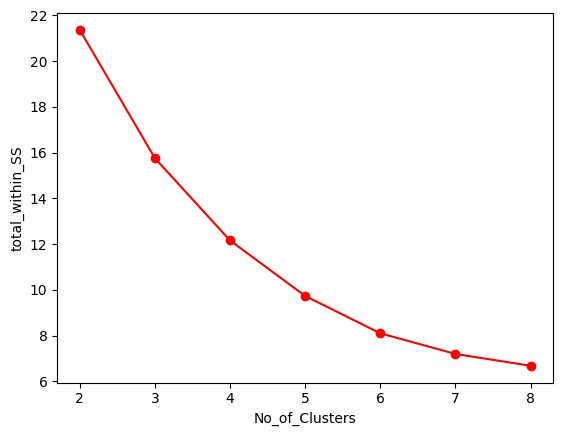

In [18]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

## Selecting 4 clusters from above graph

In [19]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [20]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
Insurance['clust'] = mb # creating a  new column and assigning it to new column

In [21]:
Insurance.head() #Dataset Clustered

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800.0,26.0,233.0,3890.076336,28000.0,3
1,2950.0,27.0,130.0,2294.444444,29500.0,3
2,3100.0,28.0,144.0,2564.545455,31000.0,3
3,3250.0,30.0,65.0,1978.260870,32500.0,3
4,3400.0,32.0,56.0,2009.090909,34000.0,3


In [22]:
df_norm.head() 

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.000000,0.050847,0.725000,0.071156,0.000000
1,0.005900,0.067797,0.403125,0.011768,0.010101
2,0.011799,0.084746,0.446875,0.021821,0.020202
3,0.017699,0.118644,0.200000,0.000000,0.030303
4,0.023599,0.152542,0.171875,0.001147,0.040404


In [23]:
Insurance.iloc[:, 2:8].groupby(Insurance.clust).mean()

,Days to Renew,Claims made,Income,clust
clust,,,,
0,249.882353,16075.620962,83500.000000,0
1,164.222222,21968.181160,158083.333333,1
2,73.763158,8544.955976,119539.473684,2
3,75.296296,3564.550425,52500.000000,3


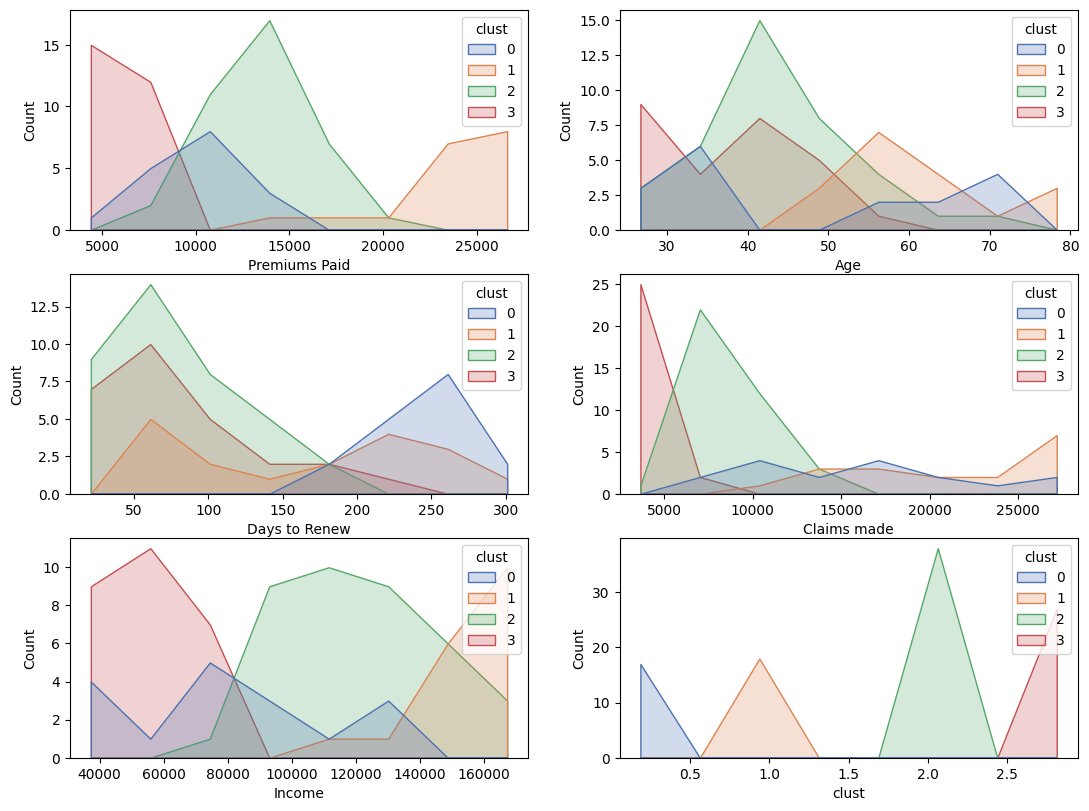

In [24]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in Insurance.columns:
    plt.subplot(a, b, c)

    sns.histplot(x= i,data= Insurance, hue= "clust",palette="deep", element= "poly" )

    c = c + 1

plt.show()